## **Installing MediaPipe**

In [ ]:
%%capture
!pip install mediapipe

## **Required Libraries**

In [ ]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pickle
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.manifold import TSNE
from google.colab import drive
import mediapipe as mp
import csv
import xgboost


## **Import Dataset**

In [ ]:
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/AFLW2000-3D.zip

Mounted at /content/gdrive
Archive:  gdrive/My Drive/AFLW2000-3D.zip
   creating: AFLW2000/
   creating: AFLW2000/Code/
  inflating: AFLW2000/Code/DrawSolidHead.m  
  inflating: AFLW2000/Code/DrawTextureHead.m  
  inflating: AFLW2000/Code/main_show_without_BFM.m  
  inflating: AFLW2000/Code/main_show_with_BFM.m  
   creating: AFLW2000/Code/Mex/
  inflating: AFLW2000/Code/Mex/compile.m  
  inflating: AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
   creating: AFLW2000/Code/ModelGeneration/
  inflating: AFLW2000/Code/ModelGeneration/ModelGenerate.m  
  inflating: AFLW2000/Code/ModelGeneration/model_info.mat  
  inflating: AFLW2000/Code/Model_Exp.mat  
  inflating: AFLW2000/Code/Model_Shape_Sim.mat  
  inflating: AFLW2000/Code/NormDirection.m  
  inflating: AFLW2000/Code/readme.txt  
  inflating: AFLW2000/Code/RotationMatrix.m  
  inflating: AFLW2000/Code/Tnorm_VnormC.mexw64  
  inflating: AFLW2000/i

**Collect images in array and its mat in another array**

In [ ]:
directory = '/content/AFLW2000'
photos_jpg = [x for x in os.listdir(directory) if x.endswith(".jpg")]
photos_mat = [x for x in os.listdir(directory) if x.endswith(".mat")]

## **Preprocessing and normalize**

**Preparing Data**

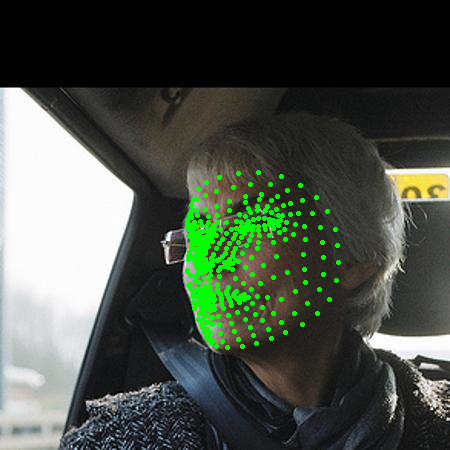

In [ ]:

# choosing random image
random_file = 'image04331'

faceModule = mp.solutions.face_mesh
# loading image and its corresponding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      cv2_imshow(image)
     

**Normalization**

199 253 219 177


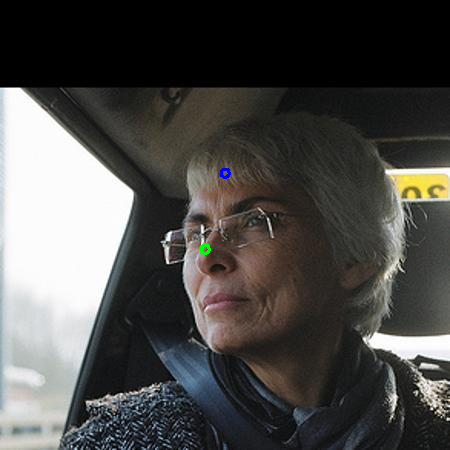

In [ ]:
# choosing random image
random_file = 'image04331'

faceModule = mp.solutions.face_mesh

with faceModule.FaceMesh(static_image_mode=True) as faces:
    
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    shape = image.shape

    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      
      for face in results.multi_face_landmarks:

          # Getting two points for normalization

          x_nose, x_corner = face.landmark[4].x , face.landmark[10].x 
          y_nose, y_corner = face.landmark[4].y , face.landmark[10].y

          relative_x_nose, relative_x_corner = int(x_nose * shape[1]), int(x_corner * shape[1])
          relative_y_nose , relative_y_corner = int(y_nose * shape[0]), int(y_corner * shape[0])
          print(relative_x_nose,relative_y_nose , relative_x_corner, relative_y_corner)
          cv2.putText(image, "o", (int(relative_x_nose),int(relative_y_nose)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
          cv2.putText(image, "o", (int(relative_x_corner),int(relative_y_corner)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)
      cv2_imshow(image)
     

11


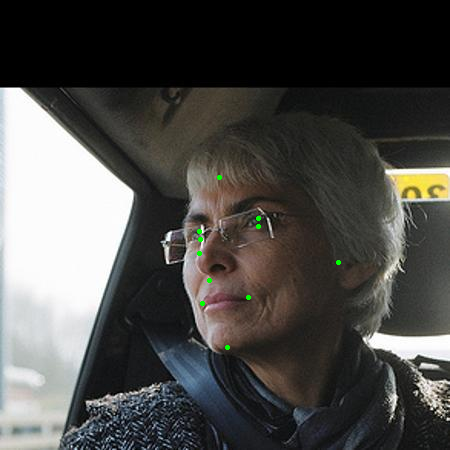

In [ ]:

# Choosing important points to capture
important_points = [4,10,61,93,323,145,152,159,291,386,374]
print(len(important_points))
     


# choosing random image
random_file = 'image04331'

faceModule = mp.solutions.face_mesh

with faceModule.FaceMesh(static_image_mode=True) as faces:
    
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    shape = image.shape

    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      
      for face in results.multi_face_landmarks:

          # looping through the important points 
          for point in important_points:

              x = face.landmark[point].x
              y = face.landmark[point].y

              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image

              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])

              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      cv2_imshow(image)

In [ ]:
# List of rows for features
list_of_rows = []
pitch_labels = []
yaw_labels = []
roll_labels = []

with faceModule.FaceMesh(static_image_mode=True) as faces:
    
    for photo in photos_jpg:
      # loading the image
        image = cv2.imread('/content/AFLW2000/'+photo)
        
        shape = image.shape
    # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.multi_face_landmarks != None: 
      
            for face in results.multi_face_landmarks:

              mat_file = sio.loadmat('/content/AFLW2000/'+photo[:-3]+'mat')
              pose_para = mat_file["Pose_Para"][0][:3]
              pitch = pose_para[0]
              yaw = pose_para[1]
              roll = pose_para[2]
    
              pitch_labels.append(pitch)
              yaw_labels.append(yaw)
              roll_labels.append(roll)

              # Getting two points for normalization
              x_nose, x_corner = face.landmark[4].x , face.landmark[10].x 
              y_nose, y_corner = face.landmark[4].y , face.landmark[10].y

              # un normalize the points
              relative_x_nose, relative_x_corner = int(x_nose * shape[1]), int(x_corner * shape[1])
              relative_y_nose , relative_y_corner = int(y_nose * shape[0]), int(y_corner * shape[0])
              
              # array to calculate the distance
              array_nose = np.array((relative_x_nose,relative_y_nose))
              array_corner = np.array((relative_x_corner,relative_y_corner))

              distance = np.linalg.norm(array_nose - array_corner)
              
              row = list(np.array([[ ((landmark.x *shape[1])-relative_x_nose)/distance, 
                                            ((landmark.y*shape[0])-relative_y_nose)/distance] for landmark in face.landmark]).flatten())
              list_of_rows.append(row)

In [ ]:
array_features = np.zeros((1853,936))

array_pitch = np.zeros((1853,1))
array_roll = np.zeros((1853,1))
array_yaw = np.zeros((1853,1))

for i in range(array_features.shape[0]):
    array_features[i,:] = list_of_rows[i]
    array_pitch[i] = pitch_labels[i]
    array_roll[i] = roll_labels[i]
    array_yaw[i] = yaw_labels[i]


In [ ]:
data = np.column_stack((array_features,array_pitch,array_yaw,array_roll))
df_data = pd.DataFrame(data)
features = df_data.iloc[:,:936]
labels = df_data.iloc[:,936:]
pitch_raw = labels.iloc[:,0]
yaw_raw = labels.iloc[:,1]
roll_raw = labels.iloc[:,2]

# **Modeling**

**Spliting data**

In [ ]:
x_train, x_test, y_train_pitch, y_test_pitch = train_test_split(features, pitch_raw, test_size=0.2,shuffle=True ,random_state=42)
x_train, x_test, y_train_yaw, y_test_yaw = train_test_split(features, yaw_raw, test_size=0.2, shuffle=True, random_state=42)
x_train, x_test, y_train_roll, y_test_roll = train_test_split(features, roll_raw, test_size=0.2,shuffle=True, random_state=42)


**LinearRegression**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),linear_model.LinearRegression())
pipeline_pitch = make_pipeline(StandardScaler(),linear_model.LinearRegression())
pipeline_roll = make_pipeline(StandardScaler(),linear_model.LinearRegression())

In [ ]:
model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

In [ ]:
print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

Pitch Scores:
Mean Square Error: 0.013771044508067267
R2 Score for Test: -16.738666490848612
R2 Score for Train: 0.960504139558696


Yaw Scores:
Mean Square Error: 0.0057247094740264055
R2 Score for Test: 0.5017694632094492
R2 Score for Train: 0.9833389587283919


Roll Scores:
Mean Square Error: 0.012944124566979935
R2 Score for Test: -1.1552553100250376
R2 Score for Train: 0.9732624809858241




**Ridge**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),linear_model.Ridge(alpha=0.1, tol = 1e-4))
pipeline_pitch = make_pipeline(StandardScaler(),linear_model.Ridge(alpha=0.1, tol = 1e-4))
pipeline_roll = make_pipeline(StandardScaler(),linear_model.Ridge(alpha=0.1, tol = 1e-4))

In [ ]:
model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

In [ ]:
print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

Pitch Scores:
Mean Square Error: 0.21518748435562982
R2 Score for Test: -0.11497275233614124
R2 Score for Train: 0.3828344069437579


Yaw Scores:
Mean Square Error: 0.03640176787231913
R2 Score for Test: 0.9389034321675354
R2 Score for Train: 0.8940572688217769


Roll Scores:
Mean Square Error: 0.15925787437708486
R2 Score for Test: 0.16679195476930186
R2 Score for Train: 0.6710352699187566




**Lasso**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),linear_model.Lasso(alpha=0.2, tol = 1e-5))
pipeline_pitch = make_pipeline(StandardScaler(),linear_model.Lasso(alpha=0.2, tol = 1e-5))
pipeline_roll = make_pipeline(StandardScaler(),linear_model.Lasso(alpha=0.2, tol = 1e-5))

In [ ]:
model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

In [ ]:
print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

Pitch Scores:
Mean Square Error: 0.34378999658770876
R2 Score for Test: 0.03203908034549907
R2 Score for Train: 0.01399768780137367


Yaw Scores:
Mean Square Error: 0.1007935765953973
R2 Score for Test: 0.783982045937922
R2 Score for Train: 0.706653071708149


Roll Scores:
Mean Square Error: 0.4206186767249084
R2 Score for Test: 0.4017916485168548
R2 Score for Train: 0.131165664510158




**SVM**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),svm.SVR())
pipeline_pitch = make_pipeline(StandardScaler(),svm.SVR())
pipeline_roll = make_pipeline(StandardScaler(),svm.SVR())

model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

Pitch Scores:
Mean Square Error: 0.2817811739949865
R2 Score for Test: 0.5134862874642365
R2 Score for Train: 0.19184126399612245


Yaw Scores:
Mean Square Error: 0.04604474880221896
R2 Score for Test: 0.9564225738980817
R2 Score for Train: 0.8659925951499808


Roll Scores:
Mean Square Error: 0.3282442910328583
R2 Score for Test: 0.6848364341768702
R2 Score for Train: 0.3219751612114298




**Random Forest**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),RandomForestRegressor())
pipeline_pitch = make_pipeline(StandardScaler(),RandomForestRegressor())
pipeline_roll = make_pipeline(StandardScaler(),RandomForestRegressor())

model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

Pitch Scores:
Mean Square Error: 0.06739271843224671
R2 Score for Test: -0.7932206190673654
R2 Score for Train: 0.8067152131851123


Yaw Scores:
Mean Square Error: 0.009117476553765502
R2 Score for Test: 0.8315845362810421
R2 Score for Train: 0.9734647402030754


Roll Scores:
Mean Square Error: 0.04941055465698151
R2 Score for Test: -0.6434631694375572
R2 Score for Train: 0.897937041797933




**XGBoost**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),xgboost.XGBRegressor(random_state=42))
pipeline_pitch = make_pipeline(StandardScaler(),xgboost.XGBRegressor(random_state=42))
pipeline_roll = make_pipeline(StandardScaler(),xgboost.XGBRegressor(random_state=42))

model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

[16:50:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pitch Scores:
Mean Square Error: 0.01329921826703332
R2 Score for Test: -2.797039395969703
R2 Score for Train: 0.96185735451327


Yaw Scores:
Mean Square Error: 0.008476191719415967
R2 Score for Test: 0.7129983432595207
R2 Score for Train: 0.9753311184254866


Roll Scores:
Mean Square Error: 0.008219887843271604
R2 Score for Test: -5.160711506655436
R2 Score for Train: 0.9830209137461086




**Combination of PCA and Random Forest**

In [ ]:
pipeline_yaw = make_pipeline(StandardScaler(),PCA(n_components=0.99),RandomForestRegressor())
pipeline_pitch = make_pipeline(StandardScaler(),PCA(n_components=0.99),RandomForestRegressor())
pipeline_roll = make_pipeline(StandardScaler(),PCA(n_components=0.99),RandomForestRegressor())

model_pitch = pipeline_pitch.fit(x_train,y_train_pitch)
model_yaw = pipeline_yaw.fit(x_train,y_train_yaw)
model_roll = pipeline_roll.fit(x_train,y_train_roll)

print(f'Pitch Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_pitch,model_pitch.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_pitch,model_pitch.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_pitch,model_pitch.predict(x_train))}\n\n')

print(f'Yaw Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_yaw,model_yaw.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_yaw,model_yaw.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_yaw,model_yaw.predict(x_train))}\n\n')

print(f'Roll Scores:')
print(f'Mean Square Error: {mean_squared_error(y_train_roll,model_roll.predict(x_train))}')
print(f'R2 Score for Test: {r2_score(y_test_roll,model_roll.predict(x_test))}')
print(f'R2 Score for Train: {r2_score(y_train_roll,model_roll.predict(x_train))}\n\n')

Pitch Scores:
Mean Square Error: 0.07949937329159923
R2 Score for Test: -1.0582653127363866
R2 Score for Train: 0.771992883266281


Yaw Scores:
Mean Square Error: 0.011193155125714645
R2 Score for Test: 0.9117173634905782
R2 Score for Train: 0.9674237408282175


Roll Scores:
Mean Square Error: 0.04000386070869355
R2 Score for Test: -0.11929843093958903
R2 Score for Train: 0.9173676071483686




# **Draw Axes**

In [ ]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

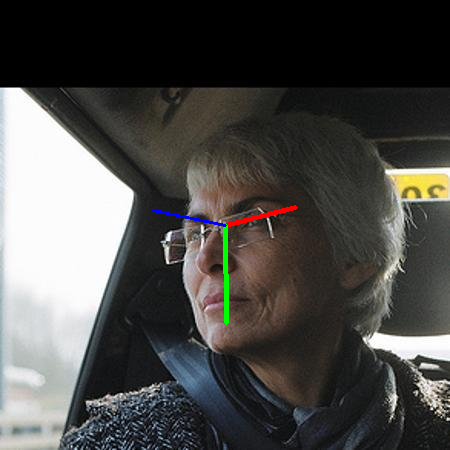

In [ ]:
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

# **Test**

In [ ]:
def imge_prediction(img):

  faceModule = mp.solutions.face_mesh
  with faceModule.FaceMesh(static_image_mode=True) as faces:
    
    
        # image_1=cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        
        shape = image.shape
        
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                            
        
        
        if results.multi_face_landmarks != None: 
      
            for face in results.multi_face_landmarks:


                # Getting two points for normalization
                x_nose, x_corner = face.landmark[4].x , face.landmark[10].x 
                y_nose, y_corner = face.landmark[4].y , face.landmark[10].y

                # un normalize the points
                relative_x_nose, relative_x_corner = int(x_nose * shape[1]), int(x_corner * shape[1])
                relative_y_nose , relative_y_corner = int(y_nose * shape[0]), int(y_corner * shape[0])
              
              #distance
                array_nose = np.array((relative_x_nose,relative_y_nose))
                array_corner = np.array((relative_x_corner,relative_y_corner))

                distance = np.linalg.norm(array_nose - array_corner)
              
                row = list(np.array([[ ((landmark.x *shape[1])-relative_x_nose)/distance, 
                                            ((landmark.y*shape[0])-relative_y_nose)/distance] for landmark in face.landmark]).flatten())
                array_row = np.array((row)).reshape(1,-1)
                pitch = model_pitch.predict(array_row)
                yaw = model_yaw.predict(array_row)
                roll = model_roll.predict(array_row)

                return(draw_axis(img, pitch,yaw,roll, tdx=relative_x_nose, tdy=relative_y_nose, size = distance))
              



**Image Test**

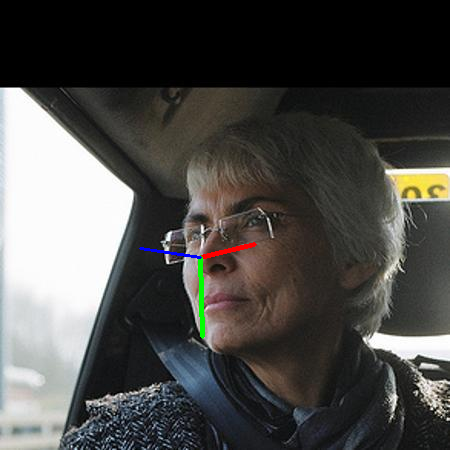

In [ ]:
img_1=cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
cv2_imshow(imge_prediction(img_1))

**Video Test**

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/V_test.mp4')
frame_rate = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/output.mp4', fourcc, frame_rate, (width, height))

while True:
        try:
        # Read the next frame from the video
            ret, frame = cap.read()
            if not ret:
              break
            frame = cv2.flip(frame,1)
            frame = imge_prediction(frame)
            # cv2_imshow(frame)
            out.write(frame)
        except Exception as error:
         print(error)
        
          
  
cap.release()
out.release()